### 3.4. Random Forest y Decision Tree

In [1]:
import pdb
import matplotlib.pyplot as plt
import numpy as np
import pylab
#seleccion de variables ver si merece la pena meterlo
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import pandas as pd 

#modelado del machine learning esto meter si o si
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

import seaborn as sns


from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot



#para hacer el PCA
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import accuracy_score



import warnings
warnings.filterwarnings('ignore')

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


#para hacer VotingClassifier
from sklearn.ensemble import VotingClassifier

#PARA HACER EL GRADIENTE DEL ERROR

#Decision Tree Regression with AdaBoost
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier




from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate



In [2]:
#from tune_sklearn import TuneGridSearchCV


def get_models():
    models = dict()
# explore number of features from 1 to 7
    for i in range(1,6):
	    models[str(i)] = RandomForestClassifier(max_features=i)
    return models
def get_models_estimator():
    models = dict()
	# define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000]
    for n in n_trees:
    	models[str(n)] = RandomForestClassifier(n_estimators=n)
    return models

def get_models_depth():
    models = dict()
	# consider tree depths from 1 to 7 and None=full
    depths = [i for i in range(1,20)] + [None]
    for n in depths:
    	models[str(n)] = RandomForestClassifier(max_depth=n)
    return models


def get_models_DT():
    models = dict()
# explore number of features from 1 to 7
    for i in range(1,15):
	    models[str(i)] = DecisionTreeClassifier(max_features=i)
    return models

In [3]:
def get_models_depth_DT():
    models = dict()
	# consider tree depths from 1 to 7 and None=full
    depths = [i for i in range(1,20)] + [None]
    for n in depths:
    	models[str(n)] = DecisionTreeClassifier(max_depth=n)
    return models
def voting_forest_lineal(X,y):
    r1 = LogisticRegression()
    r2 = RandomForestClassifier(n_estimators=100,max_depth=7,max_features=6, random_state=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)
    import pdb;pdb.set_trace()
    er = VotingClassifier([('lr', r1), ('rf', r2)])
    er=er.fit(X_train, y_train)
    resultado=er.predict(X_test)
    RSS = mean_squared_error(y_test,resultado) 

    R_squared = er.score(X,y)

In [4]:
def regressor_predictions(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)

    #HACER LA PREDICCION EN LA COMBINACION DE LOS 3 MODELOS Y DE MANERA INDIVDUAL
    reg1 = DecisionTreeClassifier(random_state=1)
    reg2 = RandomForestClassifier(random_state=1)
    reg3 = LogisticRegression()

    reg1.fit(X_train, y_train)
    reg2.fit(X_train, y_train)
    reg3.fit(X_train, y_train)

    ereg = VotingClassifier([('gb', reg1), ('rf', reg2), ('lr', reg3)])
    ereg.fit(X_train, y_train)


    pred1 = reg1.predict(X_test)
    pred2 = reg2.predict(X_test)
    pred3 = reg3.predict(X_test)
    pred4 = ereg.predict(X_test)
    #hay estacionalidad al predecir desde septiembre a diciembre debido a factores(climatologicos,festivos, culturas,...)
    #RSS = mean_squared_error(y_test,predictions) * len(y_test)
    #R_squared = model.score(X,y)  RSS = mean_squared_error(y_test,pred4) * len(y_test)
    #sale bastante mal el votingClassifier si se le incluye la regresion lineal ya que el error cuadratico medio es muy alto asi que lo quitamos.
    ereg = VotingClassifier([('gb', reg1), ('rf', reg2)])
    ereg.fit(X_train, y_train)
    pred4 = ereg.predict(X_test)

    RSS_gb = mean_squared_error(y_test,pred1)
    RSS_rf = mean_squared_error(y_test,pred2) 
    RSS_lr = mean_squared_error(y_test,pred3) 
    RSS_vr = mean_squared_error(y_test,pred4) 

    print('error cuadratico medio con  Gradient Boosting es: '+ str(RSS_gb))
    print('error cuadratico medio con  Random forest es: '+ str(RSS_rf))
    print('error cuadratico medio con lineal regression es: '+ str(RSS_lr))
    print('error cuadratico medio con voting regressor es: '+ str(RSS_vr))

    #plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
    plt.plot(pred2, 'b^', label='RandomForestClassifier')
    plt.plot(pred3, 'ys', label='LogisticRegression')
    plt.plot(pred4, 'r*', ms=10, label='VotingClassifier')

    plt.tick_params(axis='x', which='both', bottom=False, top=False,
                    labelbottom=False)
    plt.ylabel('predicted')
    plt.xlabel('Muestras de test por dias ordenados')
    plt.legend(loc="best")
    plt.title('prediccion de diferentes metodos de regresion del contador en el tiempo')

    plt.show()

In [5]:
def tree_adabost(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)
    rng = np.random.RandomState(1)

    #COMPROBAR CUAL ES LA PROFUNDIDAD MAXIMA IDEAL PARA DECISION TREE REGRESOR Y MAX FEATURES PARA NO OVERFITTING
    regr_1 = DecisionTreeClassifier(max_depth=4)

    regr_2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4,max_features=6),
                            n_estimators=300, random_state=rng)

    regr_1.fit(X_train, y_train)
    regr_2.fit(X_train, y_train)

    # Predict
    y_1 = regr_1.predict(X_test)
    y_2 = regr_2.predict(X_test)
    import pdb;pdb.set_trace()

    RSS_dt = mean_squared_error(y_test,y_1) 
    RSS_Ab = mean_squared_error(y_test,y_2) 

    print('error cuadratico medio con decision Tree es: '+ str(RSS_dt))
    print('error cuadratico medio con Ada Boost es: '+ str(RSS_Ab))

    # Plot the results  RSS = mean_squared_error(y_test,y_1) * len(y_test)
    np_test=y_test.to_numpy()
    plt.plot(y_1, 'gd', label='DecisionTreeClassifier')
    plt.plot(y_2, 'b^', label='AdaBoostClassifier')
    plt.plot(np_test, 'ys', label='reales')

    plt.tick_params(axis='x', which='both', bottom=False, top=False,labelbottom=False)
    plt.ylabel('predicted')
    plt.xlabel('training samples')
    plt.legend(loc="best")
    plt.title("Boosted Decision Tree Regression")

    plt.show()

In [6]:
def decision_tree_depth(X,y):
    X_train, X_final, y_train, y_final = train_test_split(X, y, test_size=0.15, random_state=50)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=50)

    #Multi-output Decision Tree Regression¶
    # Fit regression model
    regr_1 = DecisionTreeClassifier(max_depth=2)
    regr_2 = DecisionTreeClassifier(max_depth=5)
    regr_3 = DecisionTreeClassifier(max_depth=8)
    regr_1.fit(X_train, y_train)
    regr_2.fit(X_train, y_train)
    regr_3.fit(X_train, y_train)

    # Predict
    y_1 = regr_1.predict(X_test)
    y_2 = regr_2.predict(X_test)
    y_3 = regr_3.predict(X_test)
    import pdb;pdb.set_trace()
    
    RSS_2 = mean_squared_error(y_test,y_1) 
    RSS_5 = mean_squared_error(y_test,y_2) 
    RSS_8 = mean_squared_error(y_test,y_3) 

    print('error cuadratico medio con  profundidad de 2 es: '+ str(RSS_2))
    print('error cuadratico medio con  profundidad de 5 es: '+ str(RSS_5))
    print('error cuadratico medio con profundidad de 8 es: '+ str(RSS_8))

    #R_squared = model.score(X,y)  RSS = mean_squared_error(y_test,y_3) * len(y_test)

    # Plot the results
    plt.plot(y_1, 'gd', label='max_depth=2')
    plt.plot(y_2, 'b^', label='max_depth=5')
    plt.plot(y_3, 'b^', label='max_depth=8')

    plt.tick_params(axis='x', which='both', bottom=False, top=False,
                    labelbottom=False)
    plt.ylabel('predicted')
    plt.xlabel('training samples')
    plt.legend(loc="best")
    plt.title("Multi-output Decision Tree Regression")

    plt.show()

In [7]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	return scores
def evaluar_hiperparametros_modelo(models,X,y):
    results, names = list(), list()
    for name, model in models.items():
        # evaluate the model
        scores = evaluate_model(model, X, y)
        # store the results
        results.append(scores)
        names.append(name)
        # summarize the performance along the way
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    # plot model performance for comparison
    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.show()


In [8]:
datos=pd.read_csv('./CSV/csv_precio_div.csv')


features=['Rooms','Distance','Bathroom','Landsize','Lattitude','Longtitude']
X=datos[features] 
y=datos['precio_div']

scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50)


In [10]:
#otro tipo de calculo de hiperparametros a partir de gridsearchcvf
param_grid= {'criterion': ['gini', 'entropy'],'max_depth': [None, 1 , 3, 5, 10],'min_samples_split': [5,10],'min_samples_leaf':[5,10]}

gs_rf=GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
gs_rf.fit(X_train,y_train)
y_pred=gs_rf.predict(X)

param_grid= {'criterion': ['gini', 'entropy'],'max_depth': [None, 3 , 5, 10, 20],'min_samples_split': [5,10],'min_samples_leaf':[5,10]}

gs_rf=GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid)
gs_rf.fit(X_train,y_train)
y_pred=gs_rf.predict(X)

# 4. Ajuste de hiperparámetros 

>1 0.956 (0.003)
>2 0.956 (0.003)
>3 0.955 (0.003)
>4 0.954 (0.003)
>5 0.953 (0.003)


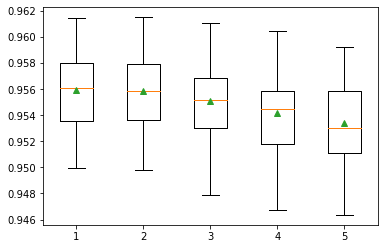

>1 0.840 (0.006)
>2 0.844 (0.007)
>3 0.844 (0.006)
>4 0.847 (0.006)
>5 0.846 (0.007)
>6 0.845 (0.006)
>7 nan (nan)
>8 nan (nan)
>9 nan (nan)
>10 nan (nan)
>11 nan (nan)
>12 nan (nan)
>13 nan (nan)
>14 nan (nan)


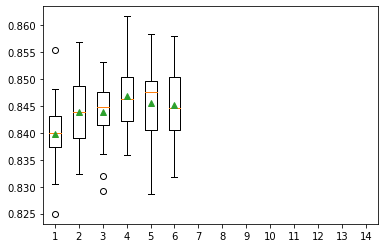

>10 0.944 (0.003)
>50 0.954 (0.003)
>100 0.956 (0.003)
>500 0.957 (0.003)
>1000 0.957 (0.003)


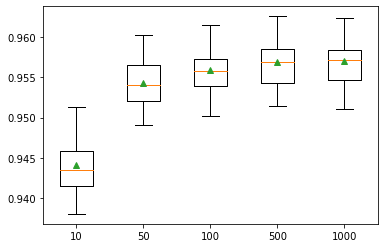

>1 0.812 (0.011)
>2 0.851 (0.007)
>3 0.877 (0.006)
>4 0.891 (0.006)
>5 0.902 (0.005)
>6 0.913 (0.005)
>7 0.923 (0.004)
>8 0.931 (0.004)
>9 0.937 (0.004)
>10 0.942 (0.004)
>11 0.946 (0.004)
>12 0.949 (0.003)
>13 0.951 (0.004)
>14 0.953 (0.003)
>15 0.954 (0.003)
>16 0.955 (0.003)
>17 0.955 (0.003)
>18 0.956 (0.003)
>19 0.956 (0.003)
>None 0.956 (0.003)


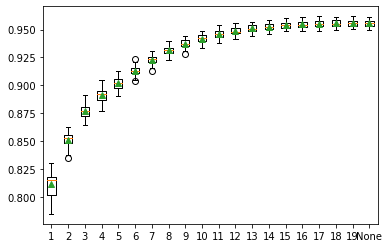

In [11]:

models = get_models()
evaluar_hiperparametros_modelo(models,X,y)

models = get_models_DT()
evaluar_hiperparametros_modelo(models,X,y)
  

models =get_models_estimator()
evaluar_hiperparametros_modelo(models,X,y)


models =get_models_depth()
evaluar_hiperparametros_modelo(models,X,y)

